In [2]:
# Setup
%pylab inline
import matplotlib
import numpy as np
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


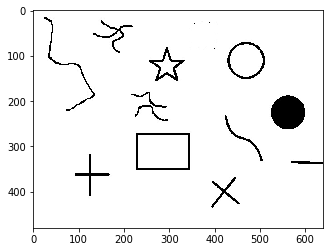

In [3]:
# Open Image
filename = 'sobel.jpg'
im = Image.open(filename)
matplotlib.pyplot.imshow(im) # Check that image loaded properly

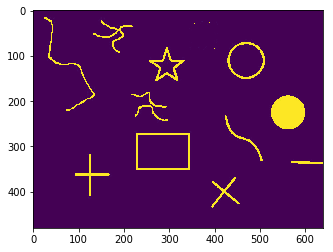

In [4]:
# Image Prep
im = np.array(im) # Change to Numpy Array
im = im[:,:,0] # From RGB to Grayscale
im = np.invert(im) # Invert Colors
matplotlib.pyplot.imshow(im) # Make sure numpy inverted colors

## Corner Using Sobel
Bad idea I was just curious how it would work. The answer is not well, like I expected.

Harris is a more common way to do this I just wanted to see how it would work.

Would benefit from eliminating nearby weak corners and sticking with the ones in local area with highest magnitude.

It favors 45 degree angles, which makes sense with the way the algo was written.

Would be better to try to find intances where there are two strong gradients that are orthogonal.

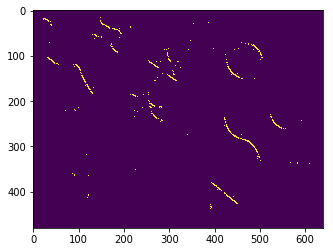

In [11]:
# Sobel Algorithm 2
kernelx = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])
kernely = np.array([[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]])
m, n = kernelx.shape # Get Kernel Shape
imconv = np.zeros((w,h))
assert kernelx.shape == kernely.shape
threshold = 5
for a in range(w-m+1):
    for b in range(h-n+1):
        if np.sum( im[a:a+m, b:b+n]*kernelx) > threshold and np.sum( im[a:a+m, b:b+n]*kernely ) > threshold:
            imconv[a][b] = 1
        #imconv[a][b] = np.sqrt( np.sum( im[a:a+m, b:b+n]*kernelx )**2 + np.sum( im[a:a+m, b:b+n]*kernely )**2 )
matplotlib.pyplot.imshow(imconv) # Show Results of Sobel